# Assignment 3 
## Text Analytics, Social Media Scrapping
### Ramya , SHU ID 0935993


#### Data Collection from the web
Data can be collected using APIs, typically for social media 

Data can be “Scrapped” from any website (using scrapy andRegularexpressions

In [1]:
#!pip install praw

## Authentication

In [2]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="BB3Y91DIn_izYlWCqIM2xw",
    client_secret="p-GNweZQhLOKHVq1Zf4XhbrlZ2vC0Q",
    user_agent=user_agent
)

In [3]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

## Get Trending Topic from your Subreddit

The **"recession"** subreddit channel will be use for this project

In [4]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("recession").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

A Stamford CT partially WFH employee would be paid 15% less
p2b06c
MikeMauls
1628680556.0
17
0.95
https://www.businessinsider.com/google-salary-calculator-work-from-home-pay-cut-technology-2021-8
0


**Get total comment in Subreddit**

In [5]:
headlines = set()
for submission in reddit.subreddit("recession").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

67


### Create a dataframe from the scrapped data

In [6]:
 
bitcoin_df = pd.DataFrame(headlines)
bitcoin_df.head()

,0
0,Neoliberal solutions won’t save us from this p...
1,THE world's biggest economies may plunge into ...
2,Unground economy is booming
3,Probability Statistics Based on Over 51 Years ...
4,OECD warns that Unemployment will end the year...


### columns

In [7]:
bitcoin_df.columns

RangeIndex(start=0, stop=1, step=1)

In [8]:
bitcoin_df.columns = ['Titles']
bitcoin_df.head()

,Titles
0,Neoliberal solutions won’t save us from this p...
1,THE world's biggest economies may plunge into ...
2,Unground economy is booming
3,Probability Statistics Based on Over 51 Years ...
4,OECD warns that Unemployment will end the year...


### Next we have to remove emoji & Unicode from the reddit data.

In [9]:

def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(remove_emoji)

#Show the clean text
bitcoin_df.head()

,Titles
0,Neoliberal solutions won’t save us from this p...
1,THE world's biggest economies may plunge into ...
2,Unground economy is booming
3,Probability Statistics Based on Over 51 Years ...
4,OECD warns that Unemployment will end the year...


In [10]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

### Create a function to get the subjectivity

In [32]:

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
bitcoin_df['Subjectivity'] = bitcoin_df['Titles'].apply(getSubjectivity)
bitcoin_df['Polarity'] = bitcoin_df['Titles'].apply(getPolarity)

#Now display data
bitcoin_df.head()

,Titles,Subjectivity,Polarity
0,"The economy, job growth and stock market — hav...",0.0,0.0
1,How to Invest in a Recession | Don't do What M...,0.5,0.5
2,Is Your Job Recession-Proof? (Would You Like I...,0.0,0.0
3,Probability Statistics Based on Over 51 Years ...,0.0,0.0
4,The Recession Hits An Already Hollowed-Out Mid...,0.0,0.0


## Data Visualization

In [11]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

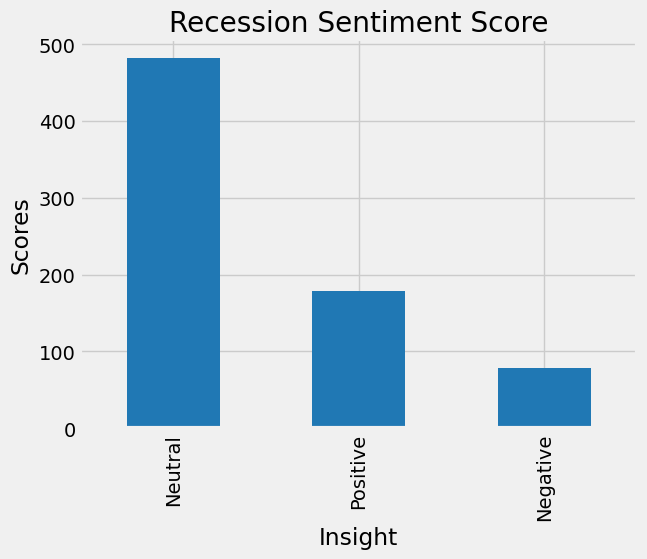

In [20]:
#Plot the values count of sentiment
plt.title("Recession Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
bitcoin_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

# Wordcloud

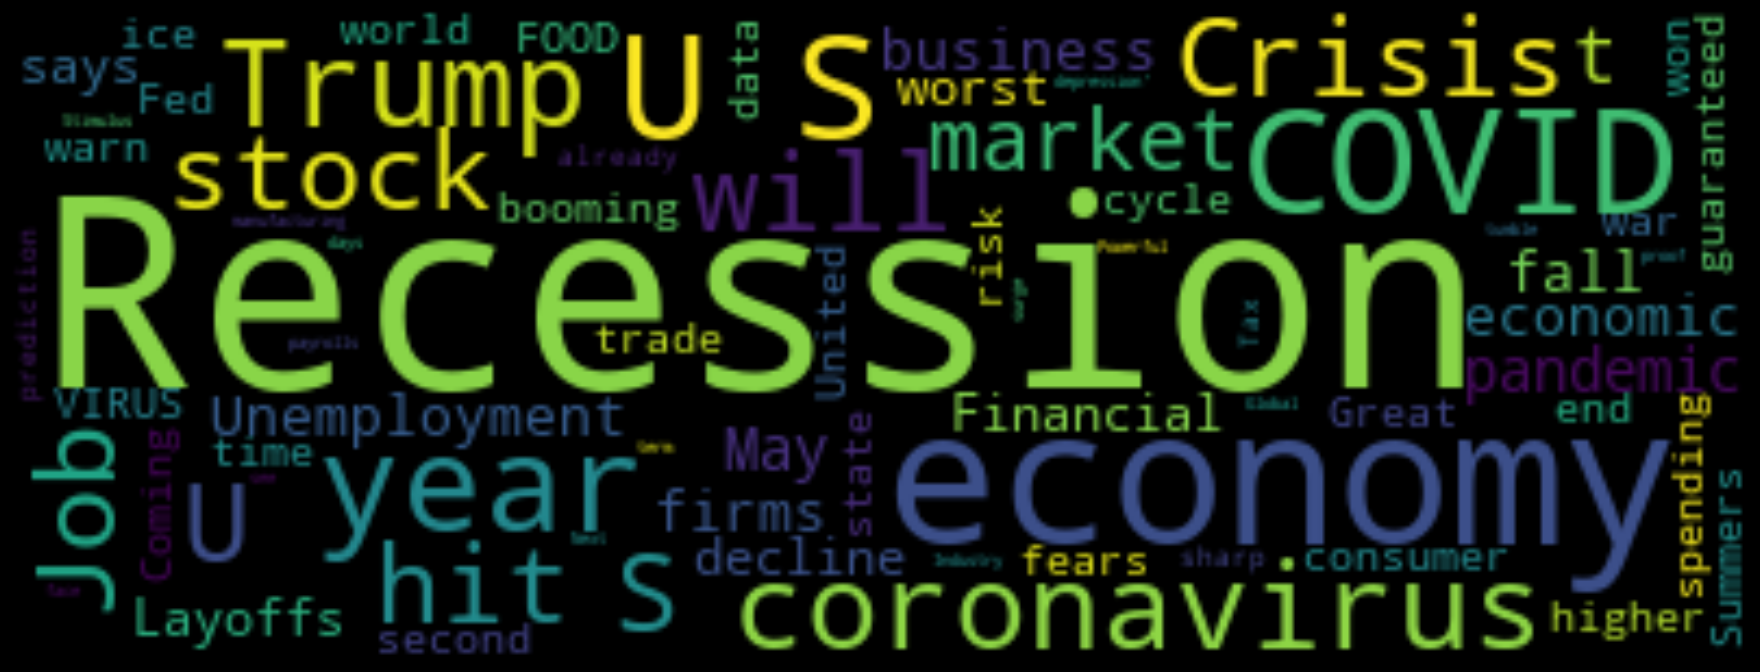

In [12]:
text = ' '.join( [twts for twts in bitcoin_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=400, height = 150,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

## wordcloud theme in circle shape

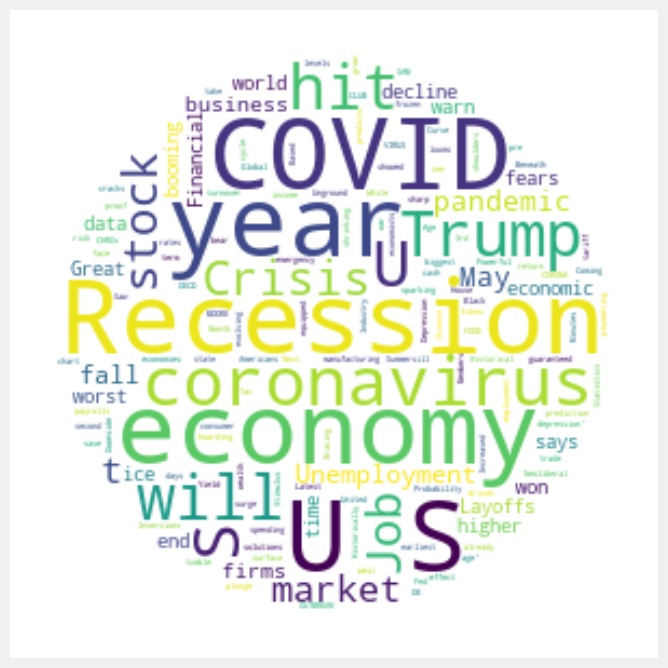

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

# Concatenate text values from all relevant columns
text = ' '.join(bitcoin_df.astype(str).values.flatten())

# Circle mask
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

# Create WordCloud with a circle mask
wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(text)

plt.figure(figsize=(8, 8))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")

plt.show()

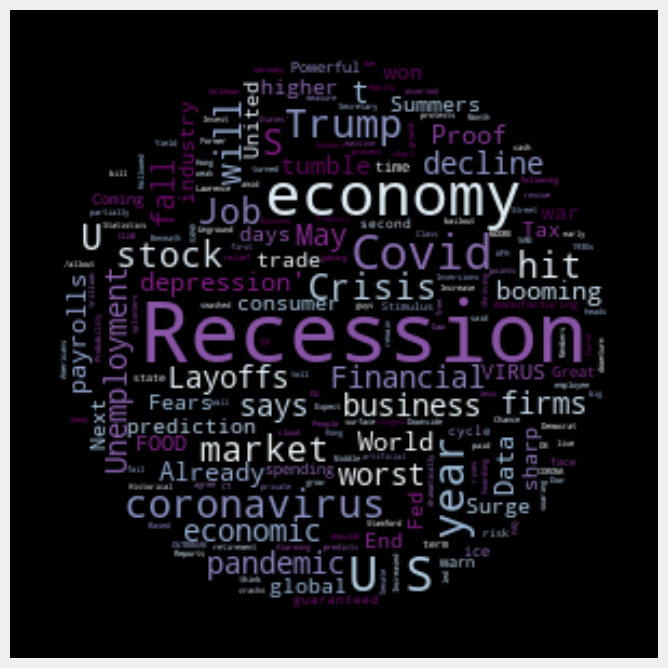

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Concatenate text values from all relevant columns
text = ' '.join(bitcoin_df.astype(str).values.flatten())

# Circle mask
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

# Create WordCloud with a circle mask and provided parameters
wc = WordCloud(
    background_color="black",
    mask=mask,
    contour_width=2,
    contour_color="black",
    colormap="BuPu_r",
    width=800,
    height=500
).generate(text)

plt.figure(figsize=(8, 8))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")

plt.show()


## Wordcloud theme in apple logo shape

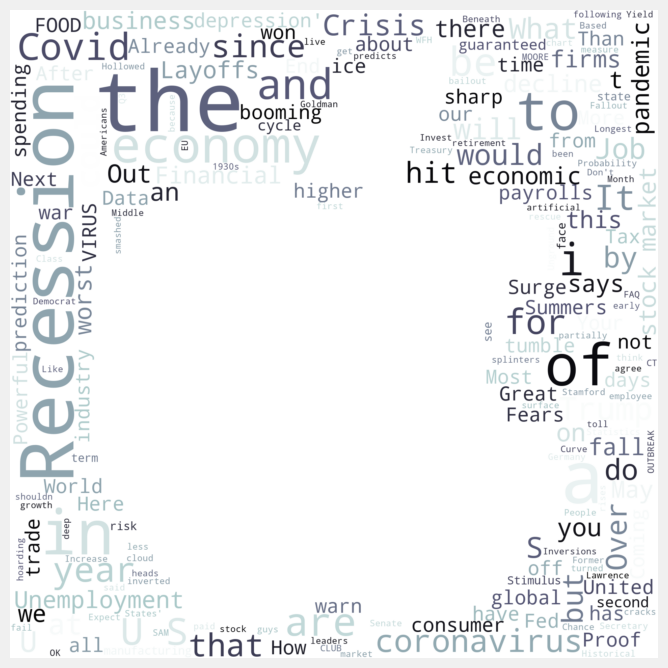

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image  # Make sure to import the Image module

# Concatenate text values from all relevant columns
text = ' '.join(bitcoin_df.astype(str).values.flatten())

# Custom mask (replace 'apple_mask' with your actual mask)
apple_mask = np.array(Image.open('C:/Users/shakkerar/Downloads/apple-logo-19.png'))

# Create WordCloud with a custom mask and provided parameters
wc = WordCloud(
    background_color='#FFFFFF',
    mask=apple_mask,
    contour_width=2,
    contour_color='#FFFFFF',
    colormap='bone',
    stopwords=['apple']
).generate(text)

plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(wc, interpolation='bilinear')

plt.show()


## Wordcloud theme in U.S flag shape

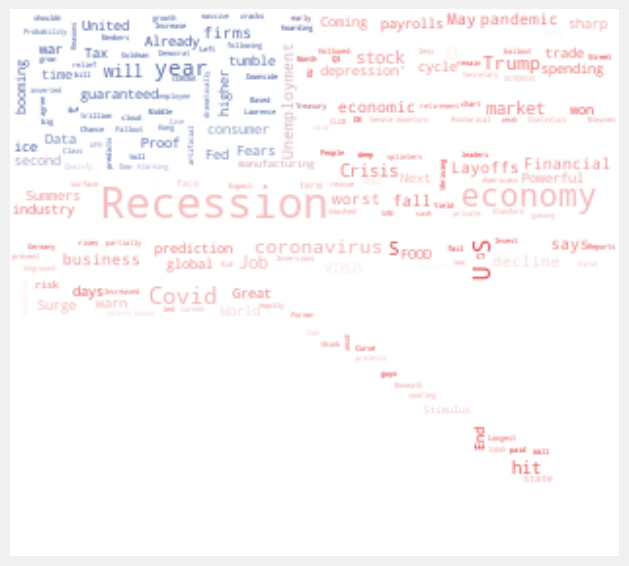

In [56]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np
from wordcloud import ImageColorGenerator
import matplotlib.pyplot as plt
import os

# Concatenate text values from 'Titles' column
text = ' '.join([twts for twts in bitcoin_df['Titles']])

# Create a word cloud image
mask = np.array(Image.open("C:/Users/shakkerar/Desktop/u.webp"))
wordcloud_usa = WordCloud(
    stopwords=STOPWORDS,
    background_color="white",
    mode="RGBA",
    max_words=1000,
    mask=mask
).generate(text)

# Create coloring from the image
image_colors = ImageColorGenerator(mask)

# Plot the word cloud
plt.figure(figsize=[7, 7])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# Ensure the "img" directory exists, if not, create it
save_dir = "img"
os.makedirs(save_dir, exist_ok=True)

# Save the word cloud to file
plt.savefig(os.path.join(save_dir, "us_wordcloud.png"), format="png")

# Display the word cloud
plt.show()


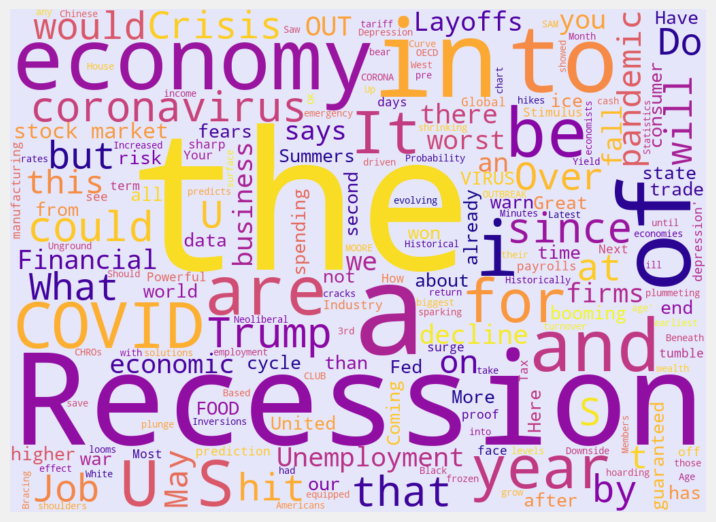

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image  # Make sure to import the Image module

# Concatenate text values from all relevant columns
text = ' '.join(bitcoin_df.astype(str).values.flatten())

# Custom mask (replace 'apple_mask' with your actual mask)
apple_mask = np.array(Image.open('C:/Users/shakkerar/Desktop/re.jpg'))

# Create WordCloud with a custom mask and provided parameters
wc = WordCloud(
    background_color='#E6E6FA',  # Change to your desired background color
    mask=apple_mask,
    contour_width=2,
    contour_color='#4B0082',  # Change to your desired contour color
    colormap='plasma',  # Change to your desired colormap
    stopwords=['apple']
).generate(text)

plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(wc, interpolation='bilinear')

plt.show()


## Wordcloud theme 

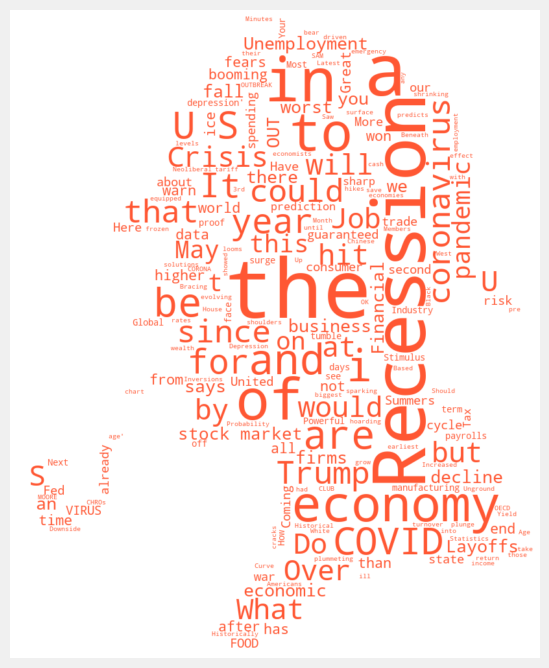

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image  # Make sure to import the Image module

# Concatenate text values from all relevant columns
text = ' '.join(bitcoin_df.astype(str).values.flatten())

# Custom mask (replace 'apple_mask' with your actual mask)
apple_mask = np.array(Image.open('C:/Users/shakkerar/Desktop/3.png'))

# Define the color you want for the WordCloud
wordcloud_color = '#FF5733'  # Replace with your desired color code

# Create WordCloud with a custom mask and provided parameters
wc = WordCloud(
    background_color='#FFFFFF',
    mask=apple_mask,
    contour_width=2,
    contour_color='#FFFFFF',
    color_func=lambda *args, **kwargs: wordcloud_color,
    stopwords=['apple']
).generate(text)

plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(wc, interpolation='bilinear')

plt.show()
